# Linear Transformations in Linear Algebra for AI/ML

## Introduction and Relevance
**Definition**: A linear transformation is a function $T: V \to W$ between two vector spaces $V$ and $W$ over the same field (typically $\mathbb{R}$ in ML) that preserves vector addition and scalar multiplication. In AI/ML, linear transformations map data or model parameters between spaces, such as transforming input features in neural network layers.

**Mathematical Definition**: A function $T: V \to W$ is linear if it satisfies:
- **Additivity**: $T(\mathbf{u} + \mathbf{v}) = T(\mathbf{u}) + T(\mathbf{v})$ for all $\mathbf{u}, \mathbf{v} \in V$.
- **Homogeneity**: $T(c \mathbf{u}) = c T(\mathbf{u})$ for all $\mathbf{u} \in V$ and scalar $c \in \mathbb{R}$.
- Equivalently: $T(c \mathbf{u} + \mathbf{v}) = c T(\mathbf{u}) + T(\mathbf{v})$.

**Matrix Representation**: For finite-dimensional spaces, a linear transformation $T: \mathbb{R}^n \to \mathbb{R}^m$ is represented by an $m \times n$ matrix $\mathbf{A}$, where $T(\mathbf{x}) = \mathbf{A} \mathbf{x}$.

**Examples**:
- **Scaling**: $T(\mathbf{x}) = 2 \mathbf{x}$, matrix $2 \mathbf{I}$.
- **Rotation in 2D**: $T([x, y]) = [x \cos \theta - y \sin \theta, x \sin \theta + y \cos \theta]$, matrix $\begin{bmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{bmatrix}$.
- **ML Context**: In neural networks, the transformation $\mathbf{y} = \mathbf{W} \mathbf{x} + \mathbf{b}$ includes a linear part $\mathbf{W} \mathbf{x}$.

**Relevance in Mathematics**:
- **Modeling Operations**: Represent geometric operations like rotations, scaling, or projections.
- **Solving Systems**: Map inputs to outputs in linear systems via matrix equations.
- **Structural Analysis**: Study properties like rank, kernel, and invertibility.
- **Generalization**: Connect vectors, matrices, and tensors through transformations.

**Relevance in AI/ML**:
- **Data Transformation**: Map input features to new spaces in neural networks or preprocessing.
- **Model Parameters**: Represent weight matrices that transform inputs to outputs.
- **Optimization**: Facilitate gradient-based updates by defining parameter evolution.
- **Dimensionality Reduction**: Project data onto lower-dimensional subspaces, as in PCA.

**Applications Overview**:
- **Neural Networks**: Transform inputs in layers via weight matrices.
- **Data Preprocessing**: Scale, rotate, or project features.
- **PCA**: Project data onto principal components for dimensionality reduction.
- **Computer Vision**: Apply transformations like rotation or shearing.
- **Kernel Methods**: Map data to higher-dimensional spaces.
- **Optimization**: Update parameters in gradient descent.

## Core Concepts and Derivations
This section covers matrix representation, functions and linear mappings, kernel, image, rank, nullity, and invertibility, with examples, derivations, and visualizations.

### 2.1 Functions and Linear Mappings
**Definition**: Linear transformations are special functions (mappings) from one vector space to another that preserve the linear structure. They are also called linear maps or homomorphisms between vector spaces.

**Explanation**: As functions, linear transformations $T$ take vectors as inputs and produce vectors as outputs while satisfying linearity. This means they map lines to lines and the origin to the origin, preserving vector space operations. In finite dimensions, every linear mapping can be represented by a matrix, but the functional view emphasizes the mapping between spaces.

**Derivation**: From the linearity conditions, for any basis, the transformation is determined by its action on the basis vectors, leading to the matrix representation. For example, if $T(\mathbf{e}_i) = \sum a_{ji} \mathbf{f}_j$, the matrix columns are $T(\mathbf{e}_i)$.

**Why Necessary**:
- **Abstract Modeling**: Treat transformations as functions for general vector spaces (e.g., function spaces in ML).
- **Composition**: Linear mappings can be composed (e.g., $S \circ T$), essential for multi-layer neural networks.
- **Generalization**: Extend to infinite-dimensional spaces (e.g., kernel methods in SVMs).
- **Theoretical Foundation**: Ensure consistency in ML algorithms involving mappings between spaces.

**Example**: The function $T: \mathbb{R}^2 \to \mathbb{R}^2$ defined by $T(x, y) = (x + y, x - y)$ is a linear mapping, as $T(c(x_1, y_1) + (x_2, y_2)) = c T(x_1, y_1) + T(x_2, y_2)$.

**ML Use-Case**: In kernel methods, the kernel function induces a linear mapping in a high-dimensional feature space without explicit computation.

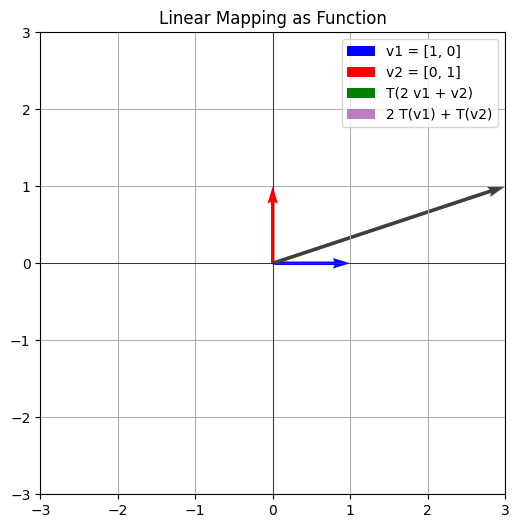

T(2 v1 + v2): [3 1]
2 T(v1) + T(v2): [3 1]


In [10]:
# Linear Mapping as Function Visualization
import numpy as np
import matplotlib.pyplot as plt

# Define linear mapping T(x, y) = (x + y, x - y)
def T_func(v):
    return np.array([v[0] + v[1], v[0] - v[1]])

# Vectors
v1 = np.array([1, 0])
v2 = np.array([0, 1])
c = 2

# Verify linearity as function
left = T_func(c * v1 + v2)
right = c * T_func(v1) + T_func(v2)

# Visualize mapping
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='blue', label='v1 = [1, 0]')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='red', label='v2 = [0, 1]')
plt.quiver(0, 0, left[0], left[1], angles='xy', scale_units='xy', scale=1, color='green', label='T(2 v1 + v2)')
plt.quiver(0, 0, right[0], right[1], angles='xy', scale_units='xy', scale=1, color='purple', alpha=0.5, label='2 T(v1) + T(v2)')

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Linear Mapping as Function')
plt.legend()
plt.show()

print("T(2 v1 + v2):", left)
print("2 T(v1) + T(v2):", right)

### 2.2 Matrix Representation of Linear Transformations
**Definition**: A linear transformation $T: \mathbb{R}^n \to \mathbb{R}^m$ is represented by an $m \times n$ matrix $\mathbf{A}$, where $T(\mathbf{x}) = \mathbf{A} \mathbf{x}$. The columns of $\mathbf{A}$ are $T(\mathbf{e}_i)$, where $\mathbf{e}_i$ are standard basis vectors.

**Explanation**: The matrix $\mathbf{A}$ encodes the transformation’s effect on basis vectors, enabling efficient computation. This bridges the functional view of linear mappings to matrix algebra.

**Why Necessary**:
- **Computational Efficiency**: Matrix multiplication is optimized in ML libraries like NumPy.
- **Model Implementation**: Represents neural network layers or preprocessing steps.
- **Data Transformation**: Maps high-dimensional data to new spaces for better separability.
- **Consistency**: Ensures transformations adhere to vector space axioms.

**Example**: For $T(x, y) = (x + y, x - y)$, the matrix is:
- $T([1, 0]) = [1, 1]$, $T([0, 1]) = [1, -1]$, so $\mathbf{A} = \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$.

**ML Use-Case**: In neural networks, the weight matrix $\mathbf{W}$ defines a linear transformation $\mathbf{W} \mathbf{x}$ in each layer.

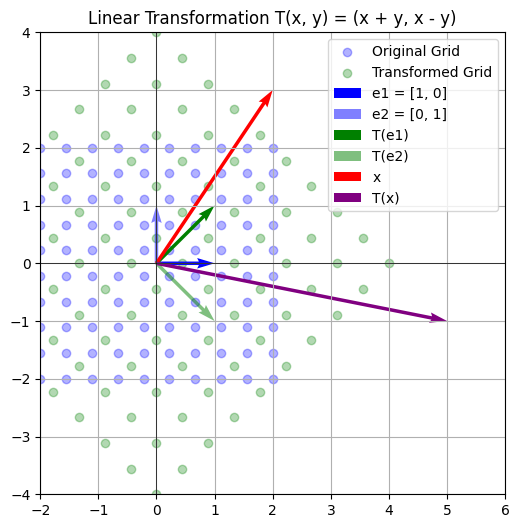

T(x): [ 5 -1]


In [13]:
# Matrix Representation and Visualization
import numpy as np
import matplotlib.pyplot as plt

# Define linear transformation T(x, y) = (x + y, x - y)
A = np.array([[1, 1], [1, -1]])
x = np.array([2, 3])
T_x = A @ x

# Function to transform a grid of points
def transform_grid(A, points):
    return A @ points

# Create a grid of points
x_grid = np.linspace(-2, 2, 10)
y_grid = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x_grid, y_grid)
points = np.vstack([X.ravel(), Y.ravel()])
transformed_points = transform_grid(A, points)

# Visualize transformation
plt.figure(figsize=(6, 6))
plt.scatter(points[0], points[1], c='blue', alpha=0.3, label='Original Grid')
plt.scatter(transformed_points[0], transformed_points[1], c='green', alpha=0.3, label='Transformed Grid')

# Basis vectors
basis = np.array([[1, 0], [0, 1]]).T
transformed_basis = A @ basis

plt.quiver(0, 0, basis[0, 0], basis[1, 0], angles='xy', scale_units='xy', scale=1, color='blue', label='e1 = [1, 0]')
plt.quiver(0, 0, basis[0, 1], basis[1, 1], angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.5, label='e2 = [0, 1]')
plt.quiver(0, 0, transformed_basis[0, 0], transformed_basis[1, 0], angles='xy', scale_units='xy', scale=1, color='green', label='T(e1)')
plt.quiver(0, 0, transformed_basis[0, 1], transformed_basis[1, 1], angles='xy', scale_units='xy', scale=1, color='green', alpha=0.5, label='T(e2)')
plt.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='red', label='x')
plt.quiver(0, 0, T_x[0], T_x[1], angles='xy', scale_units='xy', scale=1, color='purple', label='T(x)')

plt.xlim(-2, 6)
plt.ylim(-4, 4)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Linear Transformation T(x, y) = (x + y, x - y)')
plt.legend()
plt.show()

print("T(x):", T_x)


### 2.3 Kernel and Image
**Definition**:
- **Kernel** ($\ker(T)$): The set $\{\mathbf{x} \in V \mid T(\mathbf{x}) = \mathbf{0}\}$.
- **Image** ($\text{im}(T)$): The set $\{\mathbf{y} \in W \mid \mathbf{y} = T(\mathbf{x}) \text{ for some } \mathbf{x} \in V\}$.

**Explanation**: The kernel measures vectors mapped to zero (information loss), while the image describes the output space. For matrix $\mathbf{A}$, the kernel is the null space, and the image is the column space.

**Why Necessary**:
- **Redundancy Detection**: The kernel indicates linear dependence or overparameterization in ML models.
- **Output Space**: The image defines the span of possible outputs, critical for dimensionality reduction.
- **Model Analysis**: Helps understand the transformation’s effect on data.
- **Feature Engineering**: Identifies which inputs contribute to outputs in ML.

**Example**: For $T(x, y) = (x + y, x - y)$, kernel is $\{[0, 0]\}$ (solve $\mathbf{A} \mathbf{x} = \mathbf{0}$). Image is all of $\mathbb{R}^2$ since rank = 2.

**ML Use-Case**: In PCA, the image of the projection matrix is the subspace spanned by principal components.

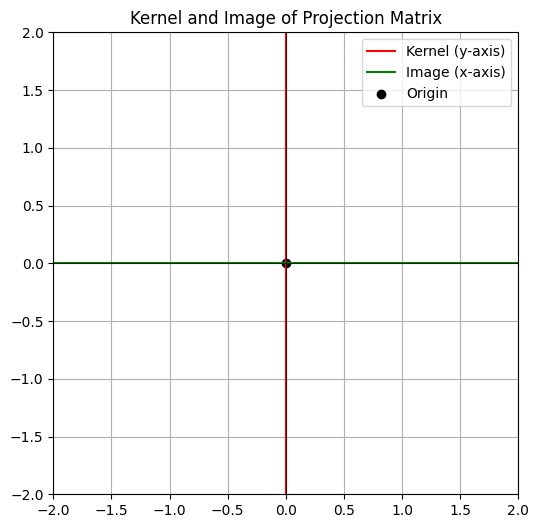

Kernel basis:
 [[0.]
 [1.]]
Image basis:
 [[1]
 [0]]


In [14]:
# Kernel and Image with Visualization
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import null_space

# Define matrix for T(x, y) = (x, 0) - Projection onto x-axis (non-trivial kernel)
A = np.array([[1, 0], [0, 0]])

# Compute kernel
kernel = null_space(A)

# Compute image (column space)
image_basis = A[:, 0:1]  # First column spans image

# Visualize
plt.figure(figsize=(6, 6))
if kernel.size > 0:
    k_v = kernel[:, 0] * 2
    plt.plot([-k_v[0], k_v[0]], [-k_v[1], k_v[1]], 'r-', label='Kernel (y-axis)')
plt.plot([-2, 2], [0, 0], 'g-', label='Image (x-axis)')
plt.scatter([0], [0], color='black', label='Origin')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Kernel and Image of Projection Matrix')
plt.legend()
plt.show()

print("Kernel basis:\n", kernel if kernel.size > 0 else "Trivial kernel {[0, 0]}")
print("Image basis:\n", image_basis)

### 2.4 Rank and Nullity
**Definition**:
- **Rank**: The dimension of $\text{im}(T)$, equal to the rank of $\mathbf{A}$.
- **Nullity**: The dimension of $\ker(T)$.
- **Rank-Nullity Theorem**: $\text{rank}(T) + \text{nullity}(T) = n$, where $n$ is the dimension of $V$.

**Explanation**: Rank measures the number of independent output dimensions, nullity measures the size of the kernel.

**Why Necessary**:
- **Model Capacity**: Rank indicates the expressiveness of a transformation (e.g., neural network layer).
- **Feature Selection**: Low rank suggests redundant features, guiding reduction.
- **Dimensionality Analysis**: Helps understand the effective dimensionality of data transformations.
- **Stability**: Non-zero nullity indicates potential information loss in ML models.

**Example**: For $\mathbf{A} = \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$, rank = 2, nullity = 0.

**ML Use-Case**: In neural networks, the rank of a weight matrix affects the layer’s ability to capture patterns.

In [15]:
# Rank and Nullity
import numpy as np

# Define matrix
A = np.array([[1, 1], [1, -1]])
rank = np.linalg.matrix_rank(A)
nullity = A.shape[1] - rank  # Rank-Nullity Theorem

print("Rank of A:", rank)
print("Nullity of A:", nullity)

Rank of A: 2
Nullity of A: 0


### 2.5 Invertibility and Isomorphisms
**Definition**: A linear transformation $T: V \to W$ is **invertible** if there exists $T^{-1}: W \to V$ such that $T^{-1} \circ T = \text{id}_V$ and $T \circ T^{-1} = \text{id}_W$. If $V = W$, $T$ is an **isomorphism** if invertible.

**Explanation**: Invertibility means the transformation is reversible, preserving all information. For a matrix $\mathbf{A}$, $T$ is invertible if $\det(\mathbf{A}) \neq 0$.

**Why Necessary**:
- **Reversibility**: Allows undoing transformations in preprocessing or modeling.
- **Solvability**: Ensures unique solutions in linear systems (e.g., regression).
- **Data Integrity**: Preserves information in transformations, critical for ML pipelines.
- **Model Stability**: Non-singular matrices ensure robust computations.

**Example**: For $\mathbf{A} = \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$, $\det(\mathbf{A}) = -2 \neq 0$, so invertible.

**ML Use-Case**: In linear regression, $\mathbf{X}^T \mathbf{X}$ must be invertible for the normal equation.

In [16]:
# Invertibility
import numpy as np

# Define matrix
A = np.array([[1, 1], [1, -1]])
det_A = np.linalg.det(A)

if det_A != 0:
    A_inv = np.linalg.inv(A)
    print("Determinant of A:", det_A)
    print("Inverse of A:\n", A_inv)
else:
    print("Matrix is not invertible.")

Determinant of A: -2.0
Inverse of A:
 [[ 0.5  0.5]
 [ 0.5 -0.5]]


## Applications in AI/ML
Linear transformations are applied in various ML tasks:
- **Neural Networks**: Transform inputs in layers via weight matrices.
- **Data Preprocessing**: Scale, rotate, or project features.
- **PCA**: Project data onto principal components for dimensionality reduction.
- **Computer Vision**: Apply transformations like rotation or shearing.
- **Kernel Methods**: Map data to higher-dimensional spaces.
- **Optimization**: Update parameters in gradient descent.

## Practical ML Examples
Below are coded examples demonstrating linear transformations in ML contexts.

In [18]:
# Example 1: Neural Network Layer
import numpy as np

# Simulate input (2 features) and weight matrix (2x3 transformation)
x = np.array([2, 3])
W = np.array([[0.5, 0.3, 0.2], [0.1, 0.4, 0.6]])

# Apply linear transformation
x = np.array([2, 3, 1]) # add a third feature to x
W = np.array([[0.5, 0.3, 0.2], [0.1, 0.4, 0.6]])
output = np.dot(W, x)
print("Neural Network Layer Output (W x):\n", output)

Neural Network Layer Output (W x):
 [2.1 2. ]


In [19]:
# Example 2: PCA (Projection as Linear Transformation)
import numpy as np
import matplotlib.pyplot as plt

# Simulate data: 4 samples, 2 features
X = np.array([[1, 2], [2, 3], [3, 5], [4, 4]])

# Center the data
mean = np.mean(X, axis=0)
centered_data = X - mean

# Compute covariance matrix and eigendecomposition
cov_matrix = np.cov(centered_data.T)
eig_vals, eig_vecs = np.linalg.eigh(cov_matrix)

# Projection matrix (first principal component)
P = eig_vecs[:, -1:]  # 2x1 matrix
projected_data = centered_data @ P

print("Projection Matrix (first PC):\n", P)
print("Projected Data:\n", projected_data)

Projection Matrix (first PC):
 [[0.70710678]
 [0.70710678]]
Projected Data:
 [[-2.12132034]
 [-0.70710678]
 [ 1.41421356]
 [ 1.41421356]]


## Summary
- **Key Concepts**: Linear transformations preserve vector space operations, represented by matrices, with properties like kernel, image, rank, nullity, and invertibility.
- **Mathematical Significance**: Model operations, solve systems, and analyze vector space structures.
- **AI/ML Relevance**: Transform data, define model architectures, and underpin algorithms like PCA and neural networks.
- **Next Steps**: Practice defining transformations, computing properties, and applying them to ML tasks.

## Tips and Practice
- **Visualize**: Use Matplotlib (as shown) or GeoGebra (https://www.geogebra.org/) to explore transformations like rotations or projections.
- **Practice Problems**:
  1. Find the matrix for $T(x, y) = (2x, y)$.
  2. Compute the kernel of $\mathbf{A} = \begin{bmatrix} 1 & 2 \\ 2 & 4 \end{bmatrix}$.
  3. Determine if $\mathbf{A} = \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$ is invertible.
- **Project Idea**: Implement a neural network layer with a linear transformation and visualize its effect on a dataset.
- **Resources**:
  - *Book*: “Linear Algebra and Its Applications” by Gilbert Strang.
  - *Online*: 3Blue1Brown’s “Essence of Linear Algebra” (YouTube, linear transformation video), Khan Academy’s Linear Algebra course.
  - *Practice*: MIT OpenCourseWare (18.06 Linear Algebra), NumPy tutorials on Real Python.

In [20]:
# Experimentation Zone
# Try defining your own linear transformation and exploring its properties!
import numpy as np

# Define a matrix for a linear transformation
A = np.array([[1, 1], [1, -1]])  # Change these values
x = np.array([2, 3])  # Input vector

# Apply transformation
T_x = np.dot(A, x)
print("T(x):", T_x)

# Verify linearity
y = np.array([1, 1])
c = 2
left = np.dot(A, c * x + y)
right = c * np.dot(A, x) + np.dot(A, y)
print("T(cx + y):", left)
print("cT(x) + T(y):", right)

# Compute rank and nullity
rank = np.linalg.matrix_rank(A)
nullity = A.shape[1] - rank
print("Rank:", rank)
print("Nullity:", nullity)

# Check invertibility
det_A = np.linalg.det(A)
if det_A != 0:
    A_inv = np.linalg.inv(A)
    print("Inverse of A:\n", A_inv)
else:
    print("Matrix is not invertible.")

T(x): [ 5 -1]
T(cx + y): [12 -2]
cT(x) + T(y): [12 -2]
Rank: 2
Nullity: 0
Inverse of A:
 [[ 0.5  0.5]
 [ 0.5 -0.5]]
